In [15]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [16]:
df_deaths = pd.read_csv('deaths.csv', error_bad_lines=False)
df_deaths.set_index(['death_id'], inplace=True)
df_deaths.reindex()
df_deaths.head(10)

b'Skipping line 2411: expected 16 fields, saw 29\nSkipping line 2611: expected 16 fields, saw 26\nSkipping line 8088: expected 16 fields, saw 29\nSkipping line 8966: expected 16 fields, saw 30\nSkipping line 10579: expected 16 fields, saw 17\nSkipping line 11511: expected 16 fields, saw 29\nSkipping line 11723: expected 16 fields, saw 27\nSkipping line 12213: expected 16 fields, saw 18\nSkipping line 13999: expected 16 fields, saw 29\nSkipping line 14258: expected 16 fields, saw 17\nSkipping line 14566: expected 16 fields, saw 25\nSkipping line 14752: expected 16 fields, saw 30\nSkipping line 16962: expected 16 fields, saw 20\nSkipping line 18604: expected 16 fields, saw 31\nSkipping line 19317: expected 16 fields, saw 28\nSkipping line 19941: expected 16 fields, saw 29\nSkipping line 20029: expected 16 fields, saw 31\nSkipping line 30615: expected 16 fields, saw 28\nSkipping line 32900: expected 16 fields, saw 29\nSkipping line 34168: expected 16 fields, saw 29\nSkipping line 35787: e

,username,player_name,rank,cause_of_death,brute_damage,brain_damage,fire_damage,oxy_damage,tox_damage,clone_damage,stamina_damage,murder_suspect_username,murder_suspect_player_name,traitor,game_id
death_id,,,,,,,,,,,,,,,
2,Cora Mathews,mcterra,AI,Severe Burns,0,0,163,40,0,0,0,NaN,NaN,none,26.0
1,Sylar,rogueninja299,Cook,Suffocation,60,0,11,200,0,0,0,NaN,NaN,none,18.0
3,Ebba Endsley,nyarlo,Shaft Miner,Severe Burns,0,0,203,3,0,0,0,NaN,NaN,none,26.0
39,Syndicate Assault Cyborg-561,mcterra,Cyborg,Blunt-Force Trauma,63,0,30,0,0,0,0,NaN,NaN,none,34.0
25,Lynn Dean,johnjefferyjackson,Chemist,Severe Burns,0,0,208,5,1,0,0,NaN,NaN,none,32.0
24,Ariana Mens,dawson1917,Assistant,Blunt-Force Trauma,140,0,0,95,0,0,0,NaN,NaN,none,31.0
22,Ariana Mens,dawson1917,Assistant,Severe Burns,0,0,200,0,0,0,0,NaN,NaN,none,31.0
23,Ariana Mens,dawson1917,Assistant,Blunt-Force Trauma,100,0,0,100,0,0,0,NaN,NaN,none,31.0
21,Ariana Mens,dawson1917,Assistant,Severe Burns,0,0,40,0,0,0,0,NaN,NaN,none,31.0


In [17]:
df_rounds = pd.read_csv('rounds.csv', error_bad_lines=False)
df_rounds.sort_values('round_id', inplace=True)
df_rounds.set_index(['round_id'], inplace=True)
df_rounds.dropna(axis= 0, subset=['round_type'], how='all', inplace=True)
df_deaths['game_type'] = df_deaths['game_id'].map(df_rounds['round_type'])

In [18]:
game_modes = ['Traitor+brothers', 'Traitor', 'Changeling', 'Wizard', 'Meteor', 'Devil', 'Monkey', 'Clockwork Cult', 'Cult', 'Nuclear Emergency', 'Revolution', 'Internal Affairs', 'Traitor+changeling', 'Dynamic Mode', 'Devil Agents', 'Gang War', 'Gangmageddon', 'Clown Ops']
df_rounds.round_type.unique()

array(['Extended', 'Traitor', 'Traitor+brothers', 'Sandbox', 'Changeling',
       'Wizard', 'Secret Extended', 'Meteor', 'Devil', 'Monkey',
       'Clockwork Cult', 'Cult', 'Internal Affairs', 'Revolution',
       'Nuclear Emergency', 'Traitor+changeling', 'Dynamic Mode',
       'Devil Agents', 'Gang War', 'Gangmageddon', 'Clown Ops'],
      dtype=object)

In [19]:
df_deaths_legit = df_deaths[df_deaths.game_type.isin(game_modes)]

In [20]:
df_deaths_legit.head()

,username,player_name,rank,cause_of_death,brute_damage,brain_damage,fire_damage,oxy_damage,tox_damage,clone_damage,stamina_damage,murder_suspect_username,murder_suspect_player_name,traitor,game_id,game_type
death_id,,,,,,,,,,,,,,,,
45,Cora Mathews,mcterra,Scientist,Blunt-Force Trauma,0,0,0,0,0,0,0,NaN,NaN,Traitor,42.0,Traitor+brothers
85,Locks,lock1000,Scientist,Blunt-Force Trauma,125,60,43,54,0,0,0,Locks,lock1000,none,67.0,Traitor
81,Locks,lock1000,Scientist,Severe Burns,5,0,213,3,3,0,0,Locks,lock1000,none,67.0,Traitor
83,Silencio,cliveo,Mime,Blunt-Force Trauma,227,0,0,0,0,0,0,Limp Dicsket,mariobetrippin,none,67.0,Traitor
82,Bimbim,jradthelad,Clown,Blunt-Force Trauma,210,0,0,1,0,0,0,Limp Dicsket,mariobetrippin,none,67.0,Traitor


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

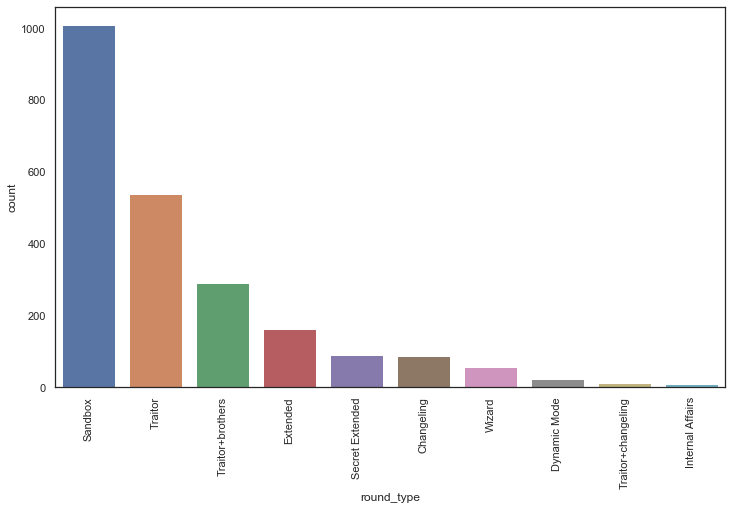

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='round_type', data=df_rounds, ax=ax, order=df_rounds.round_type.value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

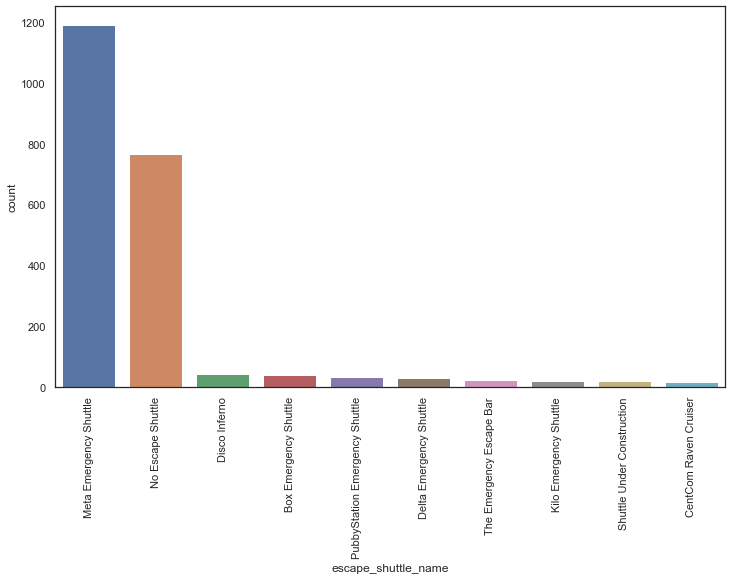

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='escape_shuttle_name', data=df_rounds, ax=ax, order=df_rounds.escape_shuttle_name.value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

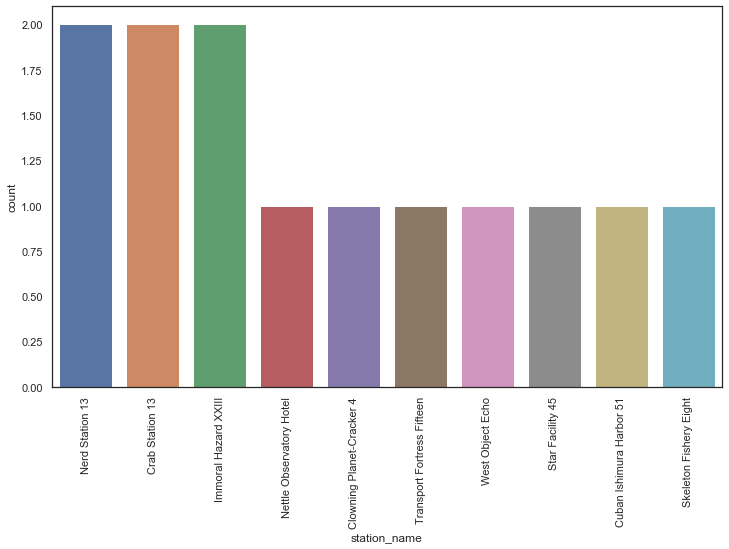

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='station_name', data=df_rounds, ax=ax, order=df_rounds.station_name.value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

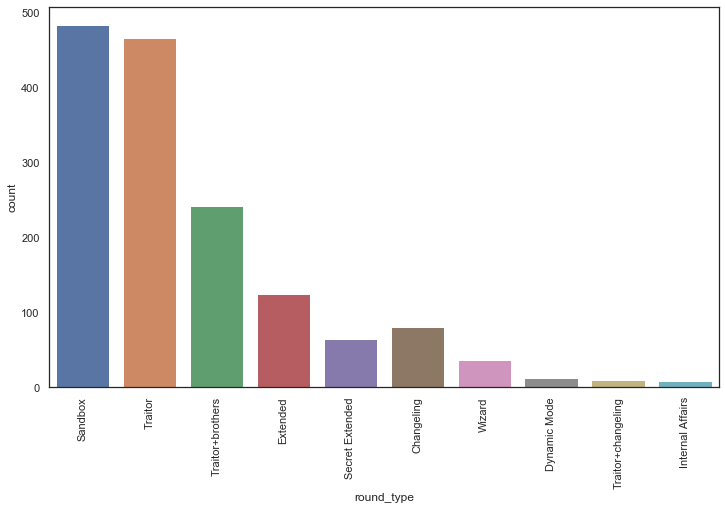

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='round_type', data=df_rounds.loc[df_rounds['complete_status'] == 'Proper Completion'], ax=ax, order=df_rounds.round_type.value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

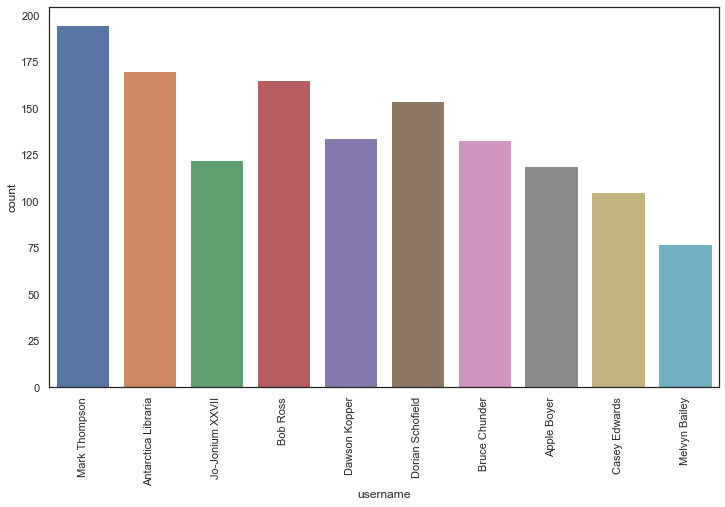

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='username', data=df_deaths_legit, ax=ax, order=df_deaths.username.value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

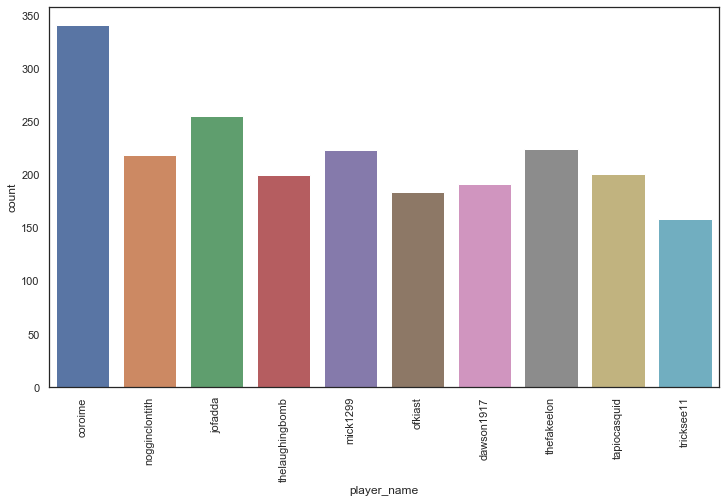

In [26]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='player_name', data=df_deaths_legit, ax=ax, order=df_deaths.player_name.value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

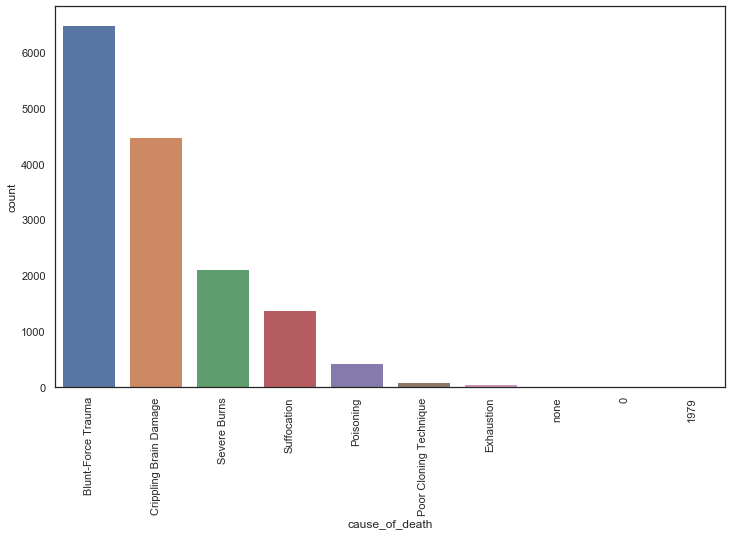

In [27]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='cause_of_death', data=df_deaths_legit, ax=ax, order=df_deaths.cause_of_death.value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

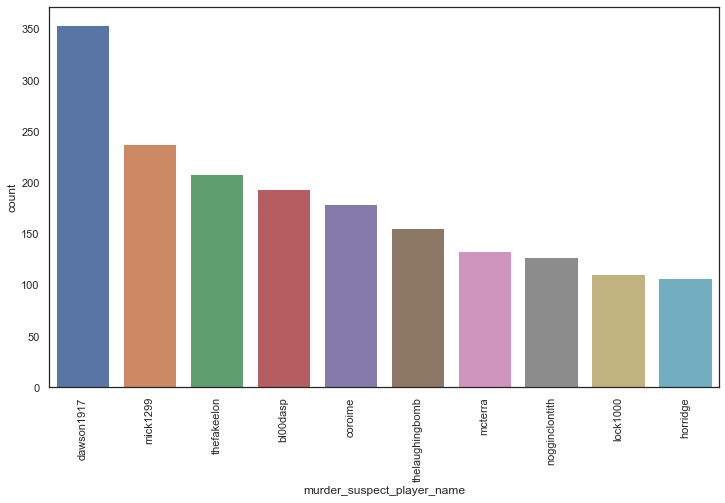

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='murder_suspect_player_name', data=df_deaths_legit, ax=ax, order=df_deaths_legit.murder_suspect_player_name.value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')